## Data Preparation 

In [1]:
#Dependencies...
import pandas as pd
import numpy as np
import random as rd
import requests
import json
import math
import os

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

from scipy.stats import shapiro 
from scipy.stats import lognorm

In [3]:
#Create data file paths:
recruits_path = "../resources/wombi_candidates.csv"
employees_path = "../resources/wombi_employees.csv"

#Read the file paths:
rec = pd.read_csv(recruits_path)
emp = pd.read_csv(employees_path)

In [4]:
rec.count()

wombus_id                          449
birth_continent                    423
gender                             448
age                                442
college_degree                     399
problem_solving_skill              433
technology_skill                   421
english_skill                      368
most_recent_income                 438
total_jobs                         313
shirt_color_preference             445
customer_exp_preference            396
work_env_preference                445
personal_growth_preference         429
honest_communication_preference    433
community_service_preference       446
remote_work_preference             417
industry_preference                444
dtype: int64

In [5]:
emp.count()

wombus_id                          233936
birth_continent                    222243
gender                             231593
age                                231599
college_degree                     205860
problem_solving_skill              224577
technology_skill                   212869
english_skill                      194172
most_recent_income                 226915
total_jobs                         156725
shirt_color_preference             231596
customer_exp_preference            205863
work_env_preference                231596
personal_growth_preference         226924
honest_communication_preference    226920
community_service_preference       229251
remote_work_preference             215217
industry_preference                231597
score                              233936
dtype: int64

In [6]:
#Evaluating the data's distribution...
#Draw a random seed and make the test reproducible:
np.random.seed(100)
#Generate a dataset that contains 1000 log-normal distributed values:
lognorm_set = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)
#Perform a Shapiro-Wilk test for normality:
shapiro(lognorm_set)

ShapiroResult(statistic=0.8157703280448914, pvalue=2.5959249901574765e-32)

## Data Transformation

### Recruits/Candidates

In [7]:
#Converting recruits' most recent income to float...
rec["most_recent_income"] = [float(str(i).replace(",", "")) for i in rec["most_recent_income"]]

rec.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,NaN,Female,NaN,0.0,8.400397,23.348271,9.105426,77367.0,5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,78979.0,4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.0,0.0,23.005739,25.484927,8.967305,38932.0,NaN,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,1108,Africa,Male,49.0,0.0,15.565866,NaN,5.914387,58511.0,NaN,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,NaN,Tech
4,1109,North America,Male,47.0,0.0,12.784366,30.619283,8.751296,65831.0,NaN,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy


In [8]:
#Finding the median values for some of the recruit variables to impute data:
age =rec['age'].median()
income = rec['most_recent_income'].median()
tech_skill = rec['technology_skill'].median()
eng_skill = rec['english_skill'].median()
solving_skill = rec['problem_solving_skill'].median()

print("The median value for age is " + str(age) + " years old.")
print("The median value for most recent income is " + str(income) + " WombiCoin.")
print("The median value for technology skill is " + str(tech_skill) + ".")
print("The median value for english skill is " + str(eng_skill) + ".")
print("The median value for problem solving skill is " + str(solving_skill) + ".")

The median value for age is 44.0 years old.
The median value for most recent income is 61080.5 WombiCoin.
The median value for technology skill is 26.03470274.
The median value for english skill is 8.142138163.
The median value for problem solving skill is 14.51715814.


In [9]:
#Finding the mode for some of the recruit variables to impute data...

import statistics
from statistics import mode

birth =rec['birth_continent'].mode()
gender = rec['gender'].mode()
work_env = rec['work_env_preference'].mode()
growth = rec['personal_growth_preference'].mode()
comm = rec['honest_communication_preference'].mode()
service = rec['community_service_preference'].mode()
remote = rec['remote_work_preference'].mode()
industry = rec['industry_preference'].mode()
shirt = rec['shirt_color_preference'].mode()

print("The mode for birth continent is " + birth + ".")
print("The mode for gender is " + gender + ".")
print("The mode for work environment is " + work_env + ".")
print("The mode for personal growth experience is " + growth + ".")
print("The mode for communication preference is " + comm + ".")
print("The mode for community service preference is " + service + ".")
print("The mode for remote work preference is " + remote + " work.")
print("The mode for industry preference is the " + industry + ".")
print("The mode for shirt color preference is a " + shirt + " shirt.")

0    The mode for birth continent is North America.
Name: birth_continent, dtype: object
0    The mode for gender is Female.
Name: gender, dtype: object
0    The mode for work environment is Strongly Agree.
Name: work_env_preference, dtype: object
0    The mode for personal growth experience is Agree.
Name: personal_growth_preference, dtype: object
0    The mode for communication preference is Neutral.
Name: honest_communication_preference, dtype: object
0    The mode for community service preference is S...
Name: community_service_preference, dtype: object
0    The mode for remote work preference is Hybrid ...
Name: remote_work_preference, dtype: object
0    The mode for industry preference is the Tech.
Name: industry_preference, dtype: object
0    The mode for shirt color preference is a Purpl...
Name: shirt_color_preference, dtype: object


In [10]:
#Imputing missing values for recruit data:
rec["birth_continent"].fillna("North America", inplace = True)
rec["gender"].fillna("Female", inplace = True)
rec["age"].fillna(44.0, inplace = True)
rec["college_degree"].fillna("Unsure", inplace = True)
rec["most_recent_income"].fillna(61080.5, inplace = True)
rec["total_jobs"].fillna("Unsure", inplace = True)
rec["technology_skill"].fillna(26.03470274, inplace = True)
rec["english_skill"].fillna(8.142138163, inplace = True)
rec["problem_solving_skill"].fillna(14.51715814, inplace = True)
rec["customer_exp_preference"].fillna("Unsure", inplace = True)
rec["work_env_preference"].fillna("Strongly Agree", inplace = True)
rec["personal_growth_preference"].fillna("Agree", inplace = True)
rec["shirt_color_preference"].fillna("Purple", inplace = True)
rec["honest_communication_preference"].fillna("Neutral", inplace = True)
rec["community_service_preference"].fillna("Strongly Agree", inplace = True)
rec["remote_work_preference"].fillna("Hybrid", inplace = True)
rec["industry_preference"].fillna("Tech", inplace = True)

In [11]:
#Checking the manipulated dataframe:
rec.head(n=20)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,North America,Female,44.0,0.0,8.400397,23.348271,9.105426,77367.0,5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,78979.0,4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.0,0.0,23.005739,25.484927,8.967305,38932.0,Unsure,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,1108,Africa,Male,49.0,0.0,15.565866,26.034703,5.914387,58511.0,Unsure,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech
4,1109,North America,Male,47.0,0.0,12.784366,30.619283,8.751296,65831.0,Unsure,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy
5,1110,North America,Male,41.0,Unsure,23.585086,27.179060,9.042111,37408.0,3.0,Purple,Strongly Disagree,Disagree,Agree,Neutral,Strongly Agree,Hybrid,Finance
6,1111,Africa,Female,54.0,0.0,14.478490,27.205718,4.806768,61372.0,4.0,Purple,Disagree,Disagree,Agree,Disagree,Strongly Agree,Hybrid,Higher Education
7,1112,North America,Male,54.0,1.0,17.664610,23.039488,6.377980,52988.0,5.0,Purple,Strongly Agree,Disagree,Disagree,Neutral,Strongly Agree,Hybrid,Higher Education
8,1113,Asia,Male,40.0,0.0,14.517158,24.277833,8.142138,53792.0,Unsure,Purple,Agree,Disagree,Agree,Neutral,Strongly Agree,Hybrid,Tech
9,1114,North America,Male,57.0,0.0,16.822555,29.276798,8.124911,61080.5,3.0,Purple,Neutral,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Hybrid,Higher Education


### Employees

In [12]:
#Converting employees' most recent income to float...
emp["most_recent_income"] = [float(str(i).replace(",", "")) for i in emp["most_recent_income"]]

emp.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,North America,Male,51.0,NaN,NaN,31.522899,8.274305,65213.0,NaN,Purple,Strongly Disagree,Disagree,Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,61.06
1,1555,North America,Female,48.0,0.0,17.016506,24.785969,9.426865,54693.0,NaN,Blue,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Hybrid,Finance,53.20
2,1556,NaN,Female,47.0,0.0,NaN,27.225131,5.772313,47381.0,4.0,Purple,Agree,Agree,Agree,Neutral,Strongly Agree,On-Site,Finance,70.18
3,1557,North America,Male,35.0,0.0,20.723280,25.528884,8.825814,44939.0,NaN,Blue,Agree,NaN,Agree,Neutral,Strongly Agree,Hybrid,Tech,58.37
4,1558,Asia,Female,45.0,0.0,15.862225,31.854325,4.140779,57731.0,NaN,Blue,Agree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Finance,61.77


In [13]:
#Finding the median value for some of the employee variables to impute data:
age =emp['age'].median()
income = emp['most_recent_income'].median()
tech_skill = emp['technology_skill'].median()
eng_skill = emp['english_skill'].median()
solving_skill = emp['problem_solving_skill'].median()

print("The median value for age is " + str(age) + " years old.")
print("The median value for most recent income is " + str(income) + " WombiCoin.")
print("The median value for technology skill is " + str(tech_skill) + ".")
print("The median value for english skill is " + str(eng_skill) + ".")
print("The median value for problem solving skill is " + str(solving_skill) + ".")

The median value for age is 45.0 years old.
The median value for most recent income is 60010.0 WombiCoin.
The median value for technology skill is 26.3804767.
The median value for english skill is 7.9319140835.
The median value for problem solving skill is 14.99398769.


In [14]:
#Finding the mode for some of the employee variables to impute data:

birth =emp['birth_continent'].mode()
gender = emp['gender'].mode()
work_env = emp['work_env_preference'].mode()
growth = emp['personal_growth_preference'].mode()
comm = emp['honest_communication_preference'].mode()
service = emp['community_service_preference'].mode()
remote = emp['remote_work_preference'].mode()
industry = emp['industry_preference'].mode()
shirt = emp['shirt_color_preference'].mode()

print("The mode for birth continent is " + birth + ".")
print("The mode for gender is " + gender + ".")
print("The mode for work environment is " + work_env + ".")
print("The mode for personal growth experience is " + growth + ".")
print("The mode for communication preference is " + comm + ".")
print("The mode for community service preference is " + service + ".")
print("The mode for remote work preference is " + remote + " work.")
print("The mode for industry preference is the " + industry + ".")
print("The mode for shirt color preference is a " + shirt + " shirt.")

0    The mode for birth continent is North America.
Name: birth_continent, dtype: object
0    The mode for gender is Female.
Name: gender, dtype: object
0    The mode for work environment is Strongly Agree.
Name: work_env_preference, dtype: object
0    The mode for personal growth experience is Agree.
Name: personal_growth_preference, dtype: object
0    The mode for communication preference is Neutral.
Name: honest_communication_preference, dtype: object
0    The mode for community service preference is S...
Name: community_service_preference, dtype: object
0    The mode for remote work preference is Hybrid ...
Name: remote_work_preference, dtype: object
0    The mode for industry preference is the Tech.
Name: industry_preference, dtype: object
0    The mode for shirt color preference is a Purpl...
Name: shirt_color_preference, dtype: object


In [15]:
#Imputing missing values for recruit data:
emp["birth_continent"].fillna("North America", inplace = True)
emp["gender"].fillna("Female", inplace = True)
emp["age"].fillna(45.0, inplace = True)
emp["college_degree"].fillna("Unsure", inplace = True)
emp["most_recent_income"].fillna(60010.0, inplace = True)
emp["total_jobs"].fillna("Unsure", inplace = True)
emp["english_skill"].fillna(7.9319140835, inplace = True)
emp["technology_skill"].fillna(26.3804767, inplace = True)
emp["problem_solving_skill"].fillna(14.99398769, inplace = True)
emp["customer_exp_preference"].fillna("Unsure", inplace = True)
emp["work_env_preference"].fillna("Strongly Agree", inplace = True)
emp["personal_growth_preference"].fillna("Agree", inplace = True)
emp["shirt_color_preference"].fillna("Purple", inplace = True)
emp["honest_communication_preference"].fillna("Neutral", inplace = True)
emp["community_service_preference"].fillna("Strongly Agree", inplace = True)
emp["remote_work_preference"].fillna("Hybrid", inplace = True)
emp["industry_preference"].fillna("Tech", inplace = True)

In [16]:
#Checking the manipulated dataframe:
emp.head(n=20)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,North America,Male,51.0,Unsure,14.993988,31.522899,8.274305,65213.0,Unsure,Purple,Strongly Disagree,Disagree,Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,61.06
1,1555,North America,Female,48.0,0.0,17.016506,24.785969,9.426865,54693.0,Unsure,Blue,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Hybrid,Finance,53.20
2,1556,North America,Female,47.0,0.0,14.993988,27.225131,5.772313,47381.0,4.0,Purple,Agree,Agree,Agree,Neutral,Strongly Agree,On-Site,Finance,70.18
3,1557,North America,Male,35.0,0.0,20.723280,25.528884,8.825814,44939.0,Unsure,Blue,Agree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech,58.37
4,1558,Asia,Female,45.0,0.0,15.862225,31.854325,4.140779,57731.0,Unsure,Blue,Agree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Finance,61.77
5,1559,North America,Male,55.0,0.0,14.725214,22.168891,9.496525,60723.0,5.0,Purple,Unsure,Strongly Agree,Agree,Neutral,Strongly Agree,On-Site,Tech,69.63
6,1560,North America,Male,47.0,0.0,10.598648,26.529753,9.386864,71583.0,3.0,Blue,Agree,Strongly Agree,Agree,Strongly Disagree,Strongly Agree,Hybrid,Higher Education,59.96
7,1561,Africa,Male,67.0,0.0,15.010481,25.382305,6.452992,59972.0,4.0,Purple,Disagree,Disagree,Neutral,Strongly Disagree,Strongly Agree,Hybrid,Finance,52.37
8,1562,North America,Male,39.0,0.0,13.553051,24.696864,9.142987,63808.0,4.0,Purple,Strongly Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Hybrid,Finance,42.72
9,1563,North America,Female,55.0,0.0,21.202096,30.773384,8.406603,43679.0,Unsure,Purple,Strongly Agree,Strongly Agree,Agree,Neutral,Agree,Hybrid,Tech,59.85


## Machine Learning and Statistical Analysis 

### Employees

In [17]:
#Preparing the dataset for linear regression...

#Assign the variables:
X = emp.drop(['score', 'wombus_id', 'birth_continent', 'gender', 'college_degree', 'total_jobs', 
             'shirt_color_preference', 'customer_exp_preference', 'work_env_preference', 'personal_growth_preference',
             'honest_communication_preference', 'community_service_preference', 'remote_work_preference', 
              'industry_preference',], axis=1)
print(X)
Y = emp.score
print(Y)

         age  problem_solving_skill  technology_skill  english_skill  \
0       51.0              14.993988         31.522899       8.274305   
1       48.0              17.016506         24.785969       9.426865   
2       47.0              14.993988         27.225131       5.772313   
3       35.0              20.723280         25.528884       8.825814   
4       45.0              15.862225         31.854325       4.140779   
...      ...                    ...               ...            ...   
233931  42.0              17.332522         28.914904       7.537856   
233932  59.0              17.754821         27.755353       7.587821   
233933  36.0              16.844175         26.380477       5.516678   
233934  41.0              11.799902         27.049392       6.406870   
233935  40.0              17.050439         28.585461       6.201589   

        most_recent_income  
0                  65213.0  
1                  54693.0  
2                  47381.0  
3                  

In [18]:
#Importing the modules for regression models:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
#Creating the model:

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)


Y_train_pred = model.predict(X_train)

In [20]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_train_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_train_pred))

Coefficients: [ 9.17891152e-02 -3.06450302e-01 -1.99496332e-02  1.86472182e-01
  1.52289687e-04]
Intercept: 48.60965308500894
Mean squared error (MSE): 58.47
Coefficient of determination (R^2): 0.12


In [21]:
Y_test_pred = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_test_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_test_pred))
     

Coefficients: [ 9.17891152e-02 -3.06450302e-01 -1.99496332e-02  1.86472182e-01
  1.52289687e-04]
Intercept: 48.60965308500894
Mean squared error (MSE): 58.97
Coefficient of determination (R^2): 0.12


In [22]:
#Writing the regression equation:
yintercept = '%.2f' % model.intercept_
age = '%.2f age' % model.coef_[0]
problem_solving = '%.4f problem_solving' % model.coef_[1]
technology='%.4f technology' % model.coef_[2]
english = '%.4f english' % model.coef_[3]
recent_income = '%.2f recent_income' % model.coef_[4]

In [23]:
#Printing the regression equation:
print('Score = ' + 
      ' ' +
      yintercept +
      ' + ' + 
      age +
      ' '  +
      problem_solving + 
      ' ' +
      technology + 
      ' + ' +
      recent_income +
      ' + ' +
      english)

Score =  48.61 + 0.09 age -0.3065 problem_solving -0.0199 technology + 0.00 recent_income + 0.1865 english


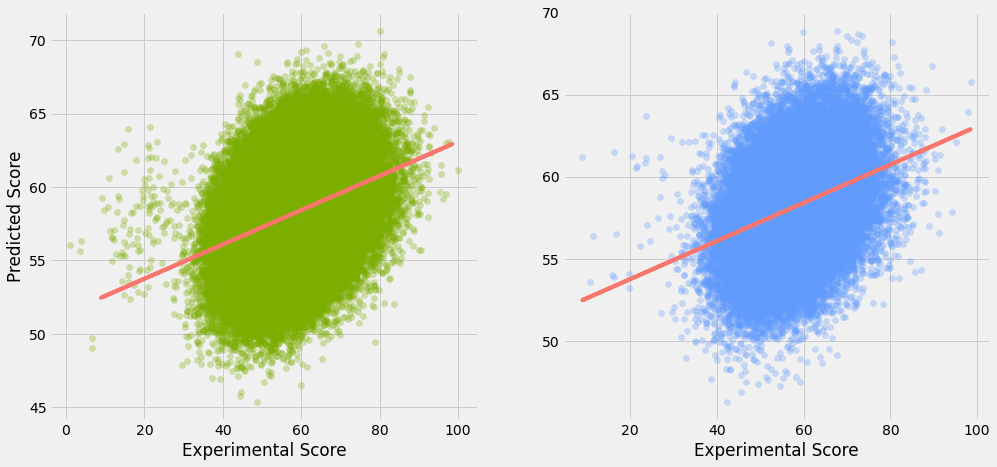

In [24]:
#Visualizations:
plt.figure(figsize=(15,7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted Score')
plt.xlabel('Experimental Score')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_test_pred, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_test_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental Score')

plt.savefig('emp_score_plot.png')
plt.show()

### Recruits/Candidates:

In [25]:
#Creating a score variable for the candidates:

rec['age'].apply(lambda x: float(x))
rec['problem_solving_skill'].apply(lambda x: float(x))
rec['english_skill'].apply(lambda x: float(x))
rec['technology_skill'].apply(lambda x: float(x))

cal_age = 0.09*(rec['age'])
cal_solve = 0.3065*(rec['problem_solving_skill'])
cal_eng = 0.1865*(rec['english_skill'])
cal_tech = 0.0199*(rec['technology_skill'])

#Compute, assign, and print the score:
cal_score = 48.61 + cal_age - cal_solve - cal_tech + cal_eng
rec = rec.assign(score = cal_score)

## New Datasets

In [26]:
#Exporting the manipulated datasets:
rec.to_csv(r'../resources/recruits.csv')
emp.to_csv(r'../resources/employees.csv')

In [27]:
#Choosing the top 100 candidates based on score:
sorted_rec = rec.sort_values(['score'], ascending = [False])
print(sorted_rec)

     wombus_id birth_continent  gender   age college_degree  \
78        1183   North America  Female  60.0            0.0   
105       1210   North America    Male  64.0            1.0   
72        1177   North America  Female  52.0            0.0   
124       1229   North America    Male  69.0            1.0   
287       1392            Asia  Female  51.0            0.0   
..         ...             ...     ...   ...            ...   
106       1211            Asia  Female  36.0            0.0   
22        1127            Asia  Female  27.0            0.0   
408       1513   North America  Female  23.0            1.0   
226       1331   North America    Male  36.0            0.0   
21        1126            Asia  Female  32.0            1.0   

     problem_solving_skill  technology_skill  english_skill  \
78                4.432909         23.911012       9.366827   
105               7.445124         19.730772       9.675103   
72                5.113707         19.150908       8.1

In [28]:
#Checking that the data was sorted correctly:
rec['score'].describe()

count    449.000000
mean      49.094013
std        1.585543
min       44.533662
25%       48.171060
50%       49.104692
75%       50.100144
max       53.922397
Name: score, dtype: float64

In [29]:
#Highlighting the top 100 candidates and exporting them to a new dataframe:
top100 = sorted_rec.head(100)
top100.to_csv(r'../resources/top100.csv')

Text(0.5, 1.0, 'Top 100 Candidates')

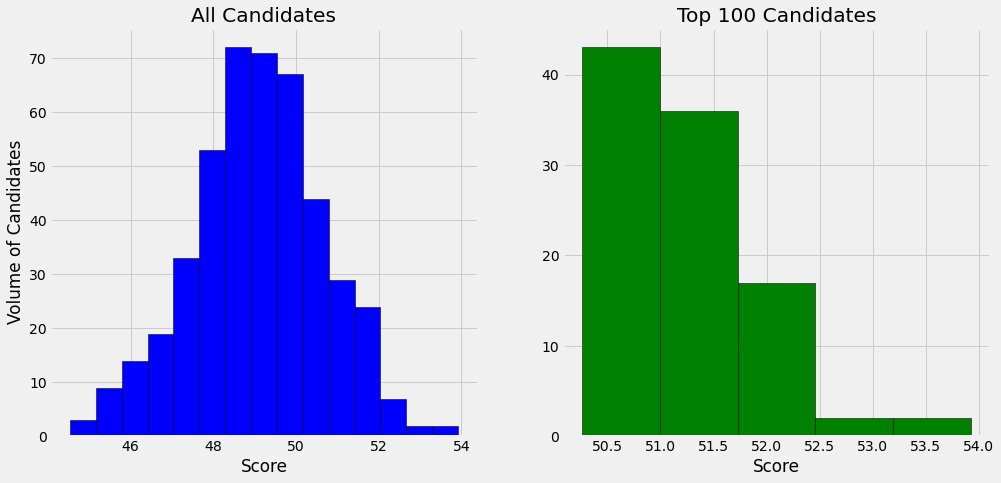

In [30]:
#Visualize the (predicted/calculated) candidate scores:
plt.figure(figsize=(15,7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.hist(rec['score'], bins = 15, color = 'blue', edgecolor= 'black')
plt.ylabel('Volume of Candidates')
plt.xlabel('Score')
plt.title('All Candidates')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.hist(top100['score'], bins = 5, color = 'green', edgecolor= 'black')
plt.xlabel('Score')
plt.title('Top 100 Candidates')

## Establishing Top Candidates via SQL

In [31]:
#Establish a connection to SQL: 
from sqlalchemy import create_engine

# Creating connection object
protocol = 'postgresql'
username = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432
database_name = 'postgres'

In [32]:
#Create engine connection:
connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'

engine = create_engine(connection_string)


In [33]:
rec.to_sql(name='candidates', con=engine, if_exists='replace', index=False)
engine.execute("SELECT wombus_id, gender, score FROM candidates ORDER BY score DESC LIMIT 100").fetchall()

[(1183, 'Female', 53.9223974166005),
 (1210, 'Male', 53.4998337070155),
 (1177, 'Female', 52.860054628769504),
 (1229, 'Male', 52.7470439499155),
 (1392, 'Female', 52.42469938124351),
 (1340, 'Male', 52.3937718938865),
 (1454, 'Male', 52.2373870258185),
 (1153, 'Male', 52.1760215561455),
 (1106, 'Female', 52.105834211197504),
 (1326, 'Female', 52.0466140224726),
 (1363, 'Female', 52.04654339932),
 (1550, 'Male', 52.0366875130645),
 (1401, 'Female', 52.019200590825),
 (1228, 'Female', 51.9742888541103),
 (1428, 'Male', 51.9091468729925),
 (1438, 'Female', 51.8962501517055),
 (1538, 'Female', 51.8750933561495),
 (1305, 'Female', 51.868668654105),
 (1529, 'Female', 51.8685458876615),
 (1147, 'Female', 51.8487524571795),
 (1234, 'Female', 51.82092935795551),
 (1317, 'Female', 51.698028256002004),
 (1415, 'Female', 51.69662291201401),
 (1315, 'Male', 51.653883081751495),
 (1541, 'Male', 51.63665161059699),
 (1243, 'Male', 51.619330000407494),
 (1444, 'Male', 51.615710590832),
 (1207, 'Femal